2023-05-30 00:22:05.754253: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.581e-01|  1.466e-01|          153716|     6.803e-02|     3.522e-02|              36926|   2.001e-02|   1.031e-02|            10808|      4.823e+03|
|--------------------------------------------------------------------------------------------------------------------------------------------

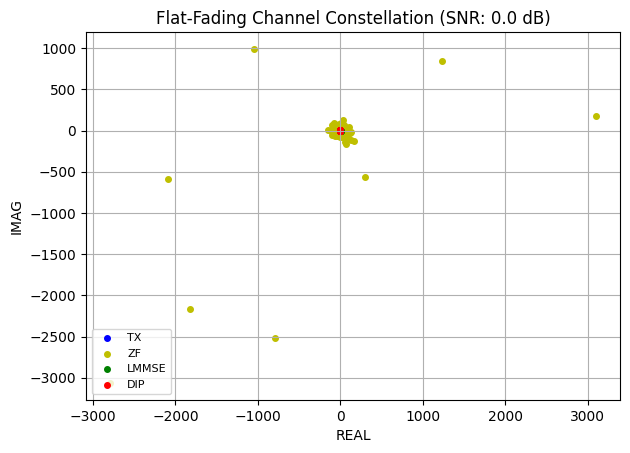

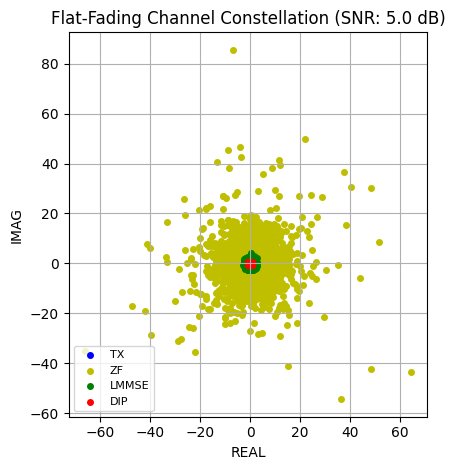

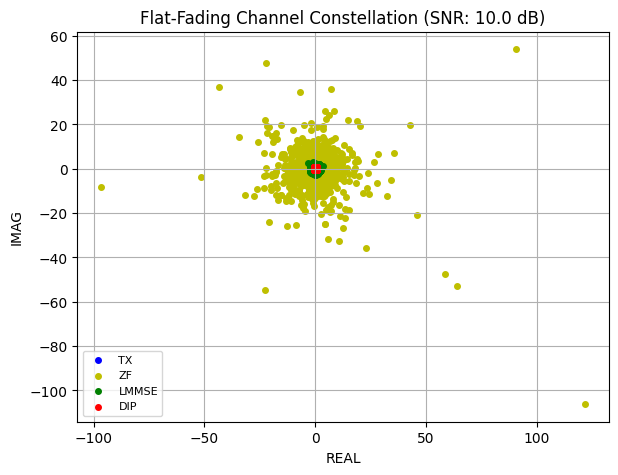

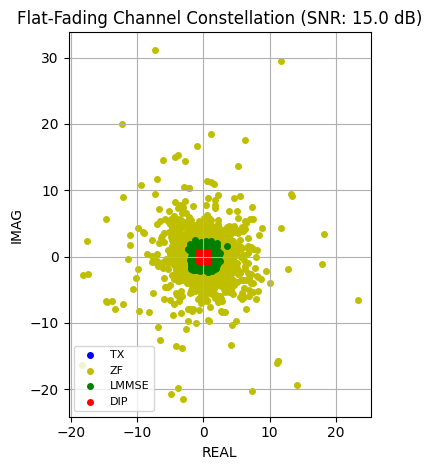

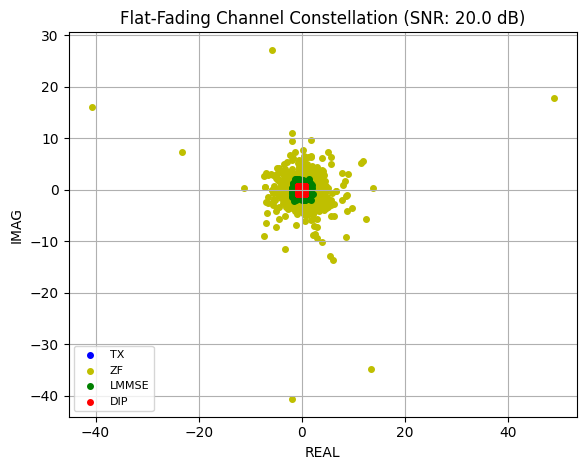

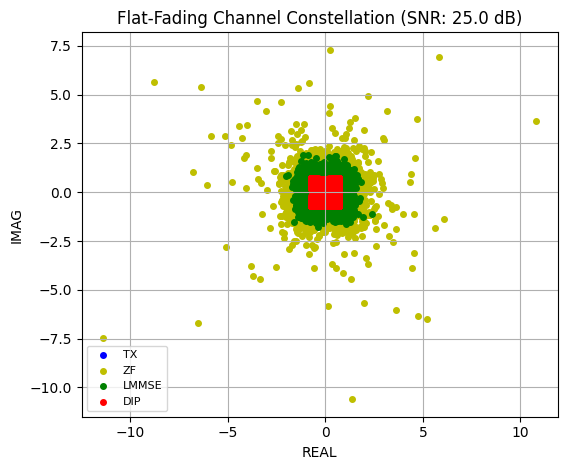

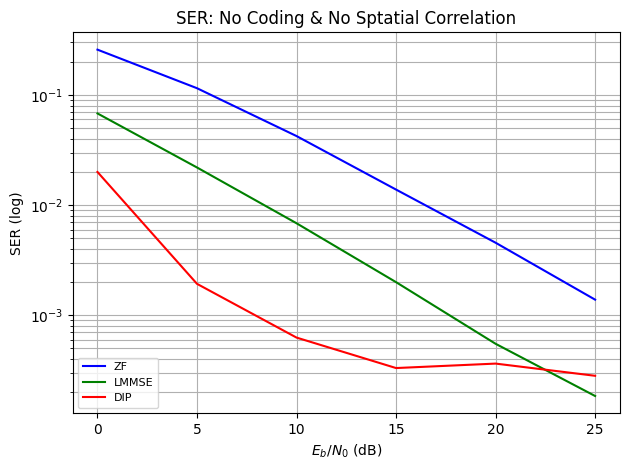

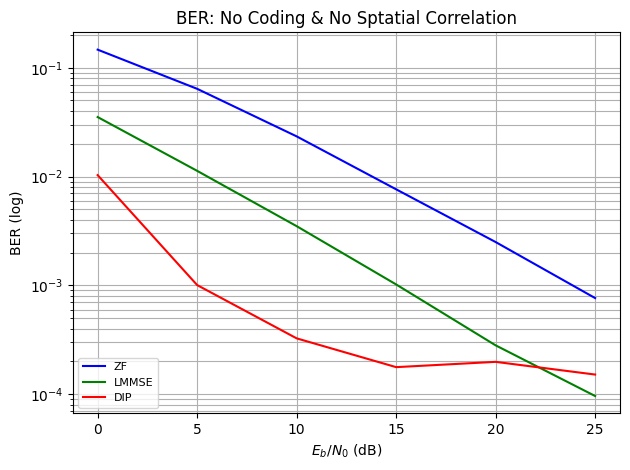

(array([ 0.,  5., 10., 15., 20., 25.]),
 array([0.25808525, 0.11525345, 0.04238892, 0.01384544, 0.00455856,
        0.00138664]),
 array([0.06803131, 0.02197647, 0.00684738, 0.0019989 , 0.00055122,
        0.00018501]),
 array([0.02000999, 0.00193024, 0.00062752, 0.00033188, 0.0003643 ,
        0.00028229]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeNCorr import ncodencorr

Block_Length = 1024        # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 8             # Transmit Antennas
NUM_RX_ANT = 8             # Receive Antennas

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 128           # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0          # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 25.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 6        # EBNO Points

model_ncodencorr = ncodencorr(Block_Length, 
                              NUM_BITS_PER_SYMBOL,
                              CONSTELLATION_TYPE,
                              DEMAPPING_METHOD,
                              NUM_RX_ANT,
                              NUM_TX_ANT)

model_ncodencorr(NUM_DATA_GROUP,
                 BATCH_SIZE,
                 EBN0_DB_MIN,
                 EBN0_DB_MAX,
                 NUM_EBN0_POINTS)